# Iris

We are given a dataset in which are registered flowers and their caracteristics.
We have to classify the said flowers in different groups thanks to machine learning.

# Summary

* Sepal length, width and species correlation
* Petal length, width and species correlation
* Correlation box

# Library used

In [46]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [47]:
filename = "./resources/Iris.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=',')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
url = 'https://raw.githubusercontent.com/Sketchjar/MachineLearningHD/main/iris.csv'
df = load_iris(url)
df

NameError: name 'load_iris' is not defined

# Missing values

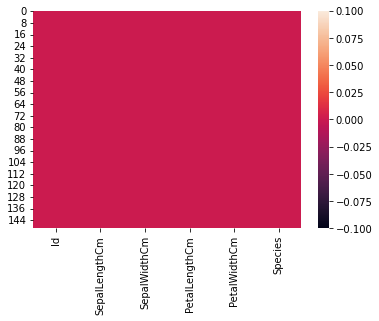

In [48]:
sns.heatmap(data.isnull())
plt.show()

In [49]:
(data.isnull().sum()/data.shape[0])*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

The dataset is filled, we can use it safely with no need of cleaning.

# Sepal length, width and species correlation

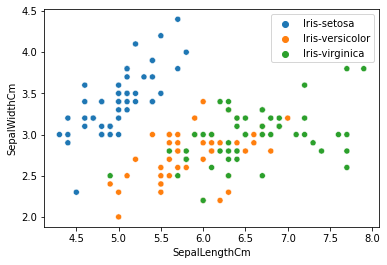

In [50]:
sepal_species_fig = sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.legend(loc='upper right')
plt.title("")
plt.show()

By studying the sepal length and width, we can see Iris-setosa clearly distinguish itself from the rest, however the two species left are quite mixed and hard to differentiate.

# Petal length, width and species correlation

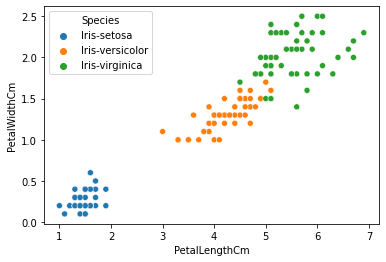

In [51]:
petal_species_fig = sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.show()

We clearly distinguish clusters depending on the petal length and width : they represent the 3 different species

# Correlation box

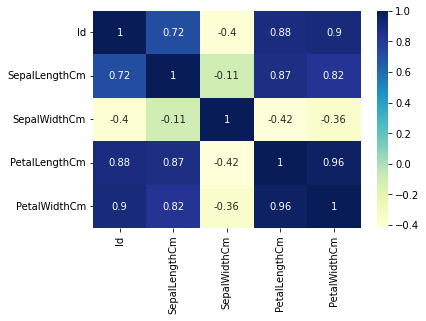

In [52]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

With this correlation box, we can see a big correlation between petals and sepals length, not so much between sepal width and the rest.